In [1]:
import gc
gc.collect()

0

In [2]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from numpy import save
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import time


In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [3]:
import sys

sys.path.append("C:/Users/admin/Desktop/IP Paris/MICAS/Cours/910/913 - Deep Learning/Project/")

# Import helper functions
from networks import NeuralNetwork
from optimization.optimizers import StochasticGradientDescent, Adam, RMSprop, Adagrad, Adadelta
from networks.loss_functions import CrossEntropy, SquareLoss
from utils.misc import bar_widgets
from networks.layers import Dense, Dropout, Activation, BatchNormalization

from helpers.helper import *
from helpers.processing import *

from Channel.parameters import *
from Channel.transmitor import *
from Channel.modulator import *
from Channel.channel import *
from Channel.equalizer import *
from Channel.demodulator import *
from Channel.detector import *
from nnet_Generator.NNetGenerator import *

Using TensorFlow backend.


In [4]:
# For styling the figures.

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

plt.rcParams["figure.figsize"] = (15,7)

# 2.2 Channel model
### Signal and system parameters

* parameters are defined in the Parameters class

In [5]:
# bandwidth
bandwidth = 1
# Number of symbols
nsymbols = 1
# Size of the constellation
M = 16
# Sample size
Nt = 2**10
# Number of Layers of the Generative network
nLayers = 500
# Number of bits
nb = int(nsymbols * np.log2(M))
# Time mesh
timeMesh = int( (nb/bandwidth)+ (10*2/ nb) )

In [6]:
# Initialize parameters
parameters = Parameters(bandwidth, nsymbols, M, Nt, nLayers, timeMesh)
#params = Parameters(bandwidth, nsymbols, M, Nt, nLayers, timeMesh)
# Initialize the Transmitor
transmitor = Transmitor()
# Initialize the Modulator
modulator = Modulator()
# Initialize the Channel
channel = Channel()
# Initialize the Equalizer
equalizer = Equalizer()
# Initialize the NNetGenerator
nnetGen = NNetGenerator(parameters)
# Initialize the Detector
detector = Detector(transmitor)
# Initialize the Demodulator
demodulator = Demodulator()

### Question 4 : Consider the peak power P=6 mW. Obtain the normalize peak power and plot the constellation C

In [7]:
parameters.power

0.06

In [8]:
parameters.M

16

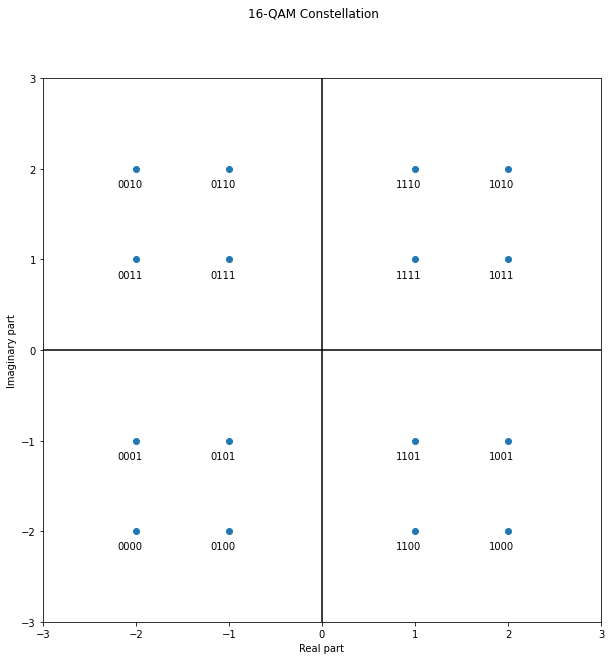

In [9]:
# Constellation
constellation, binary_str, binary_arr = transmitor.build_constellations(parameters.M)
transmitor.plot_constellation(parameters.M, constellation, binary_str)

In [10]:
print(constellation)
print(binary_str)
print(binary_arr)

[-2.-2.j -2.-1.j -2.+2.j -2.+1.j -1.-2.j -1.-1.j -1.+2.j -1.+1.j  2.-2.j
  2.-1.j  2.+2.j  2.+1.j  1.-2.j  1.-1.j  1.+2.j  1.+1.j]
['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]


## 2.2.1 Transmitter

### Question 5. Binary source

In [11]:
print("Probability of 0 : ", parameters.p)
print("Sample size : ", parameters.N)
print("Number of bits : ", parameters.nb)

Probability of 0 :  0.5
Sample size :  1024
Number of bits :  4


In [12]:
#source
b = transmitor.source(parameters.nb , parameters.p)
print("Generated source : \n", b)
print("len(source) : \n", len(b))

Generated source : 
 [1 0 1 0]
len(source) : 
 4


## Modulation
### Question 6. Bits-to-symbols mapping

In [13]:
# symbol sequence
s = transmitor.bit_to_symb(b, parameters.M)
print("symbols : \n", s)
print("len(symbols) : ", len(s))

symbols : 
 [2.+2.j]
len(symbols) :  1


The number of symbols matches the equation : $$ N/\log_{2}(M) = 4/\log_{2}(16) = 256 $$
Where N is the number of bits

### Question 7. Modulation function

In [14]:
q0t = modulator.mod(parameters.t, s, parameters.B)

### Plots in time domain

Text(0.5, 1.0, 'Modulated signal using sinc functions. Number of bits 4')

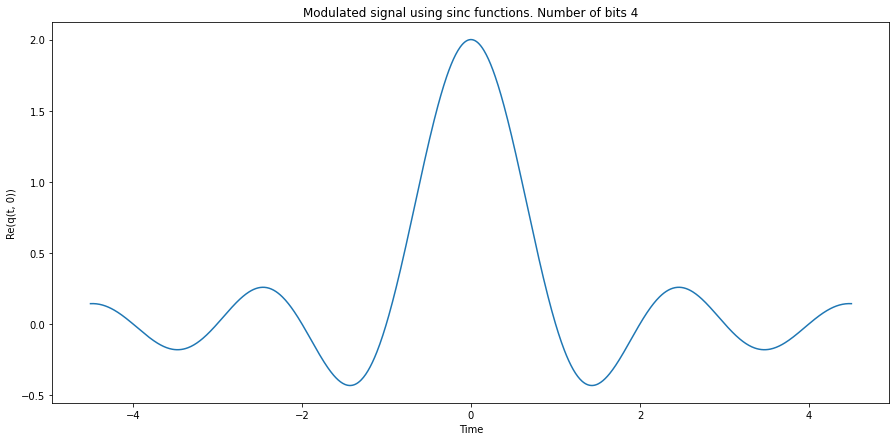

In [15]:
plt.plot(parameters.t, np.squeeze(q0t.real))
plt.xlabel('Time')
plt.ylabel('Re(q(t, 0))')
plt.title("Modulated signal using sinc functions. Number of bits "+str(parameters.nb))

Text(0.5, 1.0, 'Modulated signal using sinc functions. Number of bits 4')

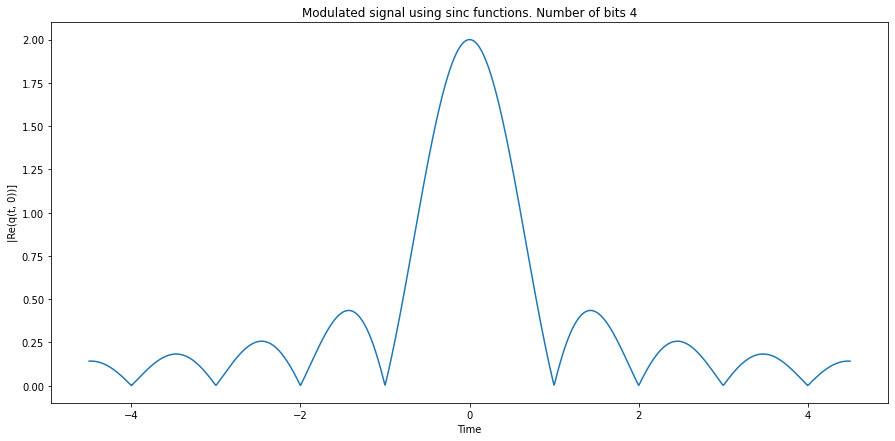

In [16]:
plt.plot(parameters.t, np.abs(np.squeeze(q0t.real)))
plt.xlabel('Time')
plt.ylabel('|Re(q(t, 0))]')
plt.title("Modulated signal using sinc functions. Number of bits "+str(parameters.nb))

### Plots in Frequency domain

In [17]:
q0f = np.fft.fft(q0t)
f = np.fft.fftfreq(parameters.N, parameters.dt)

Text(0.5, 1.0, 'Modulated signal using sinc functions. Number of bits 4')

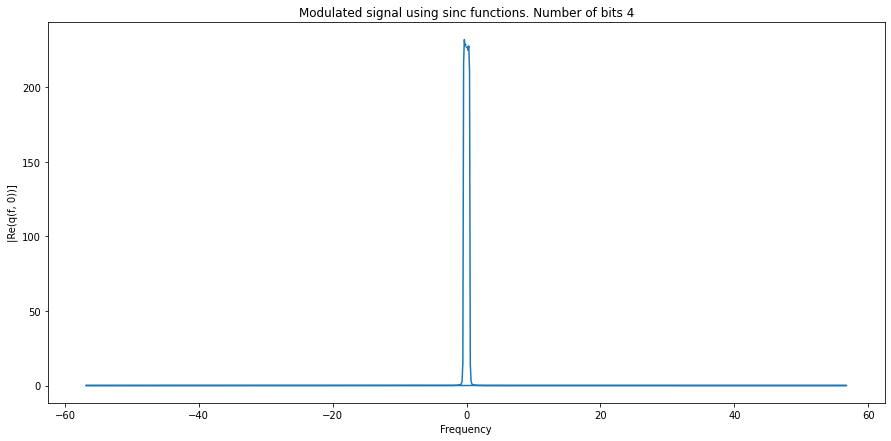

In [18]:
plt.plot(f, np.abs(np.squeeze(q0f.real)))
plt.xlabel('Frequency')
plt.ylabel('|Re(q(f, 0))]')
plt.title("Modulated signal using sinc functions. Number of bits "+str(parameters.nb))

## 2.2.2 Channel model

### Question 12. channel(t, q0t, z, sigma2, B) that outputs a realization of the stochastic process q(t,z) given q(t,0).

In [19]:
qzt, qzf = channel.channel(parameters.t, q0t, parameters.z, parameters.sigma2, parameters.B)

Text(0.5, 1.0, 'Modulated signal using sinc functions. Number of bits 4')

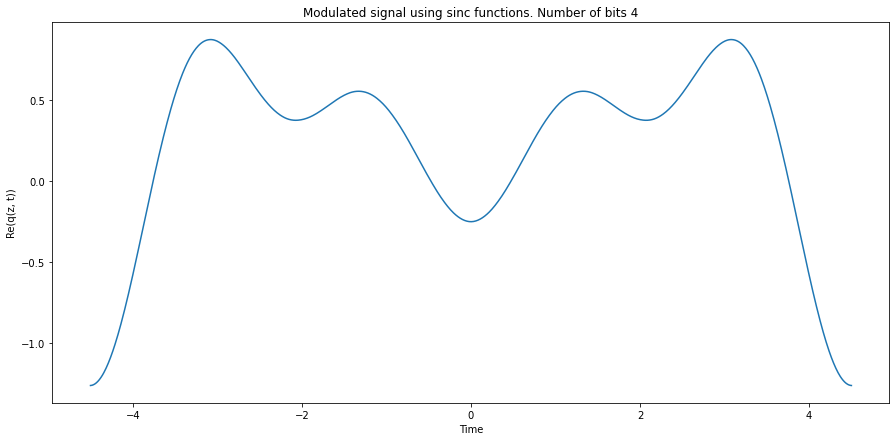

In [20]:
plt.plot(parameters.t, np.squeeze(qzt.real))
plt.xlabel('Time')
plt.ylabel('Re(q(z, t))')
plt.title("Modulated signal using sinc functions. Number of bits "+str(parameters.nb))

Text(0.5, 1.0, 'Modulated signal using sinc functions. Number of bits 4')

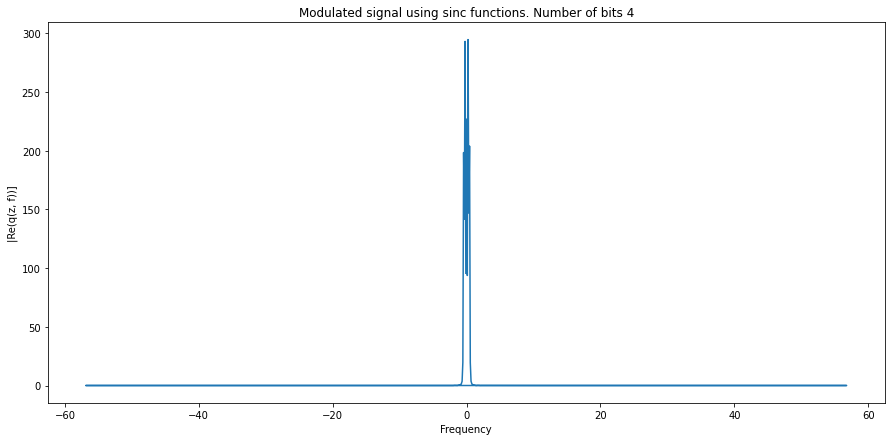

In [21]:
plt.plot(f, np.abs(np.squeeze(qzf.real)))
plt.xlabel('Frequency')
plt.ylabel('|Re(q(z, f))]')
plt.title("Modulated signal using sinc functions. Number of bits "+str(parameters.nb))

# 2.2.3 Receiver

## Equalization


**Main**
* We test the equalization part with a Gaussian input signal.


In [22]:
parameters.A

1

In [23]:
q0t = parameters.A*np.exp(-parameters.t**2)
q0f = np.fft.fft(q0t)

Text(0.5, 1.0, 'Gaussian input signal')

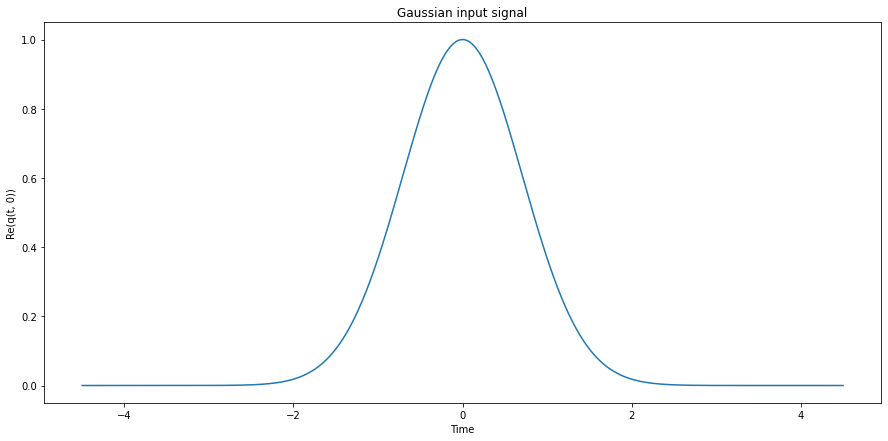

In [24]:
plt.plot(parameters.t, q0t.real)
plt.xlabel('Time')
plt.ylabel('Re(q(t, 0))')
plt.title("Gaussian input signal")

Text(0.5, 1.0, 'Gaussian input signal')

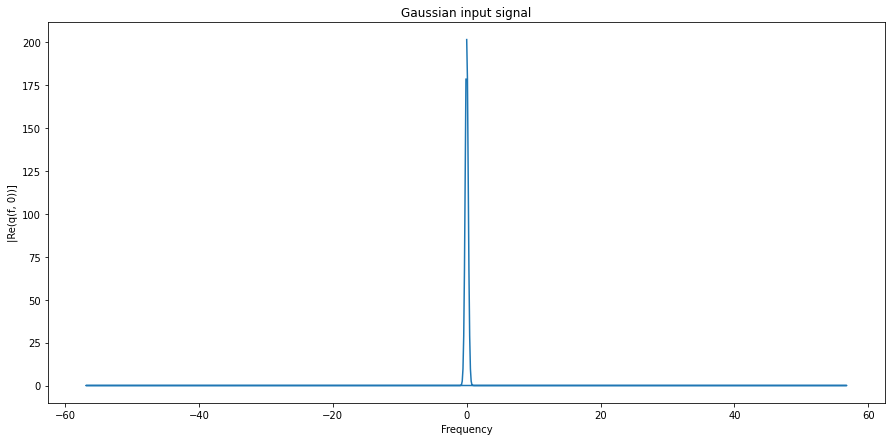

In [25]:
plt.plot(f, np.abs(q0f.real))
plt.xlabel('Frequency')
plt.ylabel('|Re(q(f, 0))]')
plt.title("Gaussian input signal")

In [26]:
# propagation (with zero noise), output in t,f
qzt, qzf = channel.channel(parameters.t, q0t, parameters.z, 0, 0) 
# equalized output
qzte, qzfe = equalizer.equalize(parameters.t, qzt, parameters.z)

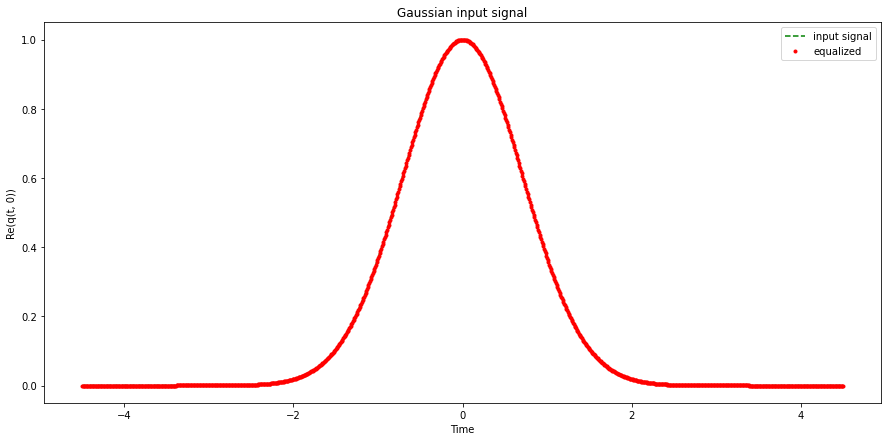

In [27]:
plt.plot(parameters.t, q0t.real, 'g--', label="input signal")
plt.plot(parameters.t, qzte.real, 'r.', label="equalized")

plt.xlabel('Time')
plt.ylabel('Re(q(t, 0))')
plt.title("Gaussian input signal")
plt.legend()

**Comments**

We can see that the equalization is very good, we are able to get back to the original signal. Let's verify this with the comparison function below.

### Comparison of Original and Equalized signals

In [28]:
def compare(x, y):
    """ This function compares the equalized signal with the input one """

    delta = np.absolute(x - y)
    return np.max(delta) <= 1e-6

In [29]:
# we compare the original signal and the equalized one
compare(q0t, qzte) 

True

## Demodulation, Detection and Demapping

### Question 17. Checking the first the **end-to-end implementation when noise is zero**. In this case, we should obtain $ \widehat{s} \approx  s $ with high accuracy

In [30]:
# bandwidth
bandwidth = 1
# Number of symbols
nsymbols = 16
# Size of the constellation
M = 16
# Sample size
Nt = 2**10
# Number of Layers of the Generative network
nLayers = 500
# Number of bits
nb = int(nsymbols * np.log2(M))
# Time mesh
timeMesh = int( (nb/bandwidth)+ (10*2/ nb) )

In [31]:
timeMesh

64

In [32]:
print("Number of bits : ", nb)

Number of bits :  64


In [33]:
# Initialize parameters
parameters = Parameters(bandwidth, nsymbols, M, Nt, nLayers, timeMesh)
# Initialize the Transmitor
transmitor = Transmitor()
# Initialize the Modulator
modulator = Modulator()
# Initialize the Channel
channel = Channel()
# Initialize the Equalizer
equalizer = Equalizer()
# Initialize the NNetGenerator
nnetGen = NNetGenerator(parameters)
# Initialize the Detector
detector = Detector(transmitor)
# Initialize the Demodulator
demodulator = Demodulator()

In [34]:
#source
b = transmitor.source(parameters.nb , parameters.p)

# symbol sequence
s = transmitor.bit_to_symb(b, parameters.M)

# Modulation
q0t = modulator.mod(parameters.t, s, parameters.B)
print("q0t : ", q0t.shape)

# propagation (with zero noise), output in t,f
qzt, qzf = channel.channel(parameters.t, q0t, 100, 0, parameters.B) 
# equalized output
qzte, qzfe = equalizer.equalize(parameters.t, qzt, 100)

print("qzt : ", qzt.shape)
print("qzte : ", qzte.shape)

print("comp : ", compare(q0t, qzte))

# Demodulation
#qzte = qzte.reshape(1,-1) # if Gaussian
shat = demodulator.demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)

# Detection
stilde, indexes = detector.detector(shat, parameters.M)
bhat = detector.symbols_to_bit(indexes, parameters.M)

q0t :  (1, 1024)
qzt :  (1, 1024)
qzte :  (1, 1024)
comp :  True


#### Let's compare the symbol-error-rate and the bit-error-rate

In [35]:
b

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [36]:
bhat

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [37]:
ser = detector.ser(s, stilde)  # symbol error rate
ber = detector.ber(b, bhat)  # bit error rate

In [38]:
print("The bit-error-rate is : ",ber)
print("The symbol-error-rate is : ",ser)

The bit-error-rate is :  0.0
The symbol-error-rate is :  0.0


## Inter-symbol interference

For $t_{0} = 4$

In [39]:
A1 = 1
A2 = 2
D = 1
t0 = 4

### z = 0

In [40]:
z = 0
qt0 = A1*np.exp(-(parameters.t+t0)**2/(2*D**2)) + A2*np.exp(-(parameters.t-t0)**2/(2*D**2))
qt1, qf1 = channel.channel(parameters.t, qt0, z, 0, parameters.B)

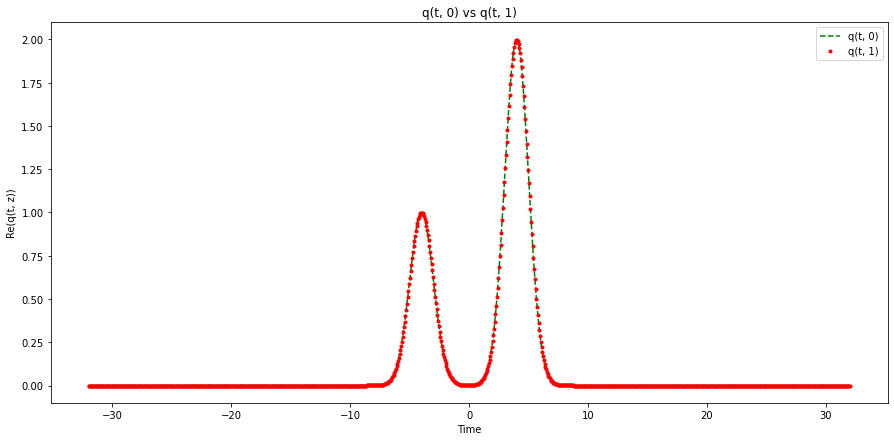

In [41]:
plt.plot(parameters.t, np.squeeze(qt0.real), 'g--', label='q(t, 0)')
plt.plot(parameters.t, np.squeeze(qt1.real), 'r.', label='q(t, 1)')
plt.xlabel('Time')
plt.ylabel('Re(q(t, z))')
plt.legend()
plt.title('q(t, 0) vs q(t, 1)')
plt.show()

### z = 1

In [42]:
z = 1
qt0 = A1*np.exp(-(parameters.t+t0)**2/(2*D**2)) + A2*np.exp(-(parameters.t-t0)**2/(2*D**2))
qt1, qf1 = channel.channel(parameters.t, qt0, z, 0, parameters.B)

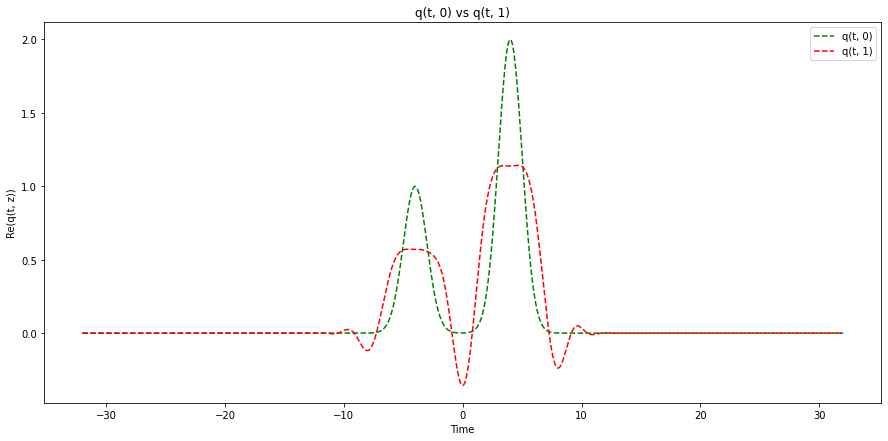

In [43]:
plt.plot(parameters.t, np.squeeze(qt0.real), 'g--', label='q(t, 0)')
plt.plot(parameters.t, np.squeeze(qt1.real), 'r--', label='q(t, 1)')
plt.xlabel('Time')
plt.ylabel('Re(q(t, z))')
plt.legend()
plt.title('q(t, 0) vs q(t, 1)')
plt.show()

For $t_{0} = 7$

In [44]:
t0 = 7

### z = 0

In [45]:
z= 0
qt0 = A1*np.exp(-(parameters.t+t0)**2/(2*D**2)) + A2*np.exp(-(parameters.t-t0)**2/(2*D**2))
qt1, qf1 = channel.channel(parameters.t, qt0, z, 0, parameters.B)

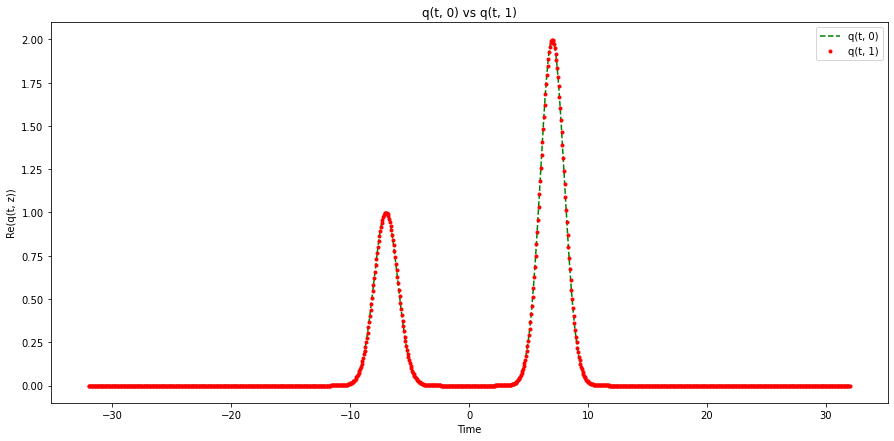

In [46]:
plt.plot(parameters.t, np.squeeze(qt0.real), 'g--', label='q(t, 0)')
plt.plot(parameters.t, np.squeeze(qt1.real), 'r.', label='q(t, 1)')
plt.xlabel('Time')
plt.ylabel('Re(q(t, z))')
plt.legend()
plt.title('q(t, 0) vs q(t, 1)')
plt.show()

### z = 1

In [47]:
z= 1
qt0 = A1*np.exp(-(parameters.t+t0)**2/(2*D**2)) + A2*np.exp(-(parameters.t-t0)**2/(2*D**2))
qt1, qf1 = channel.channel(parameters.t, qt0, z, 0, parameters.B)

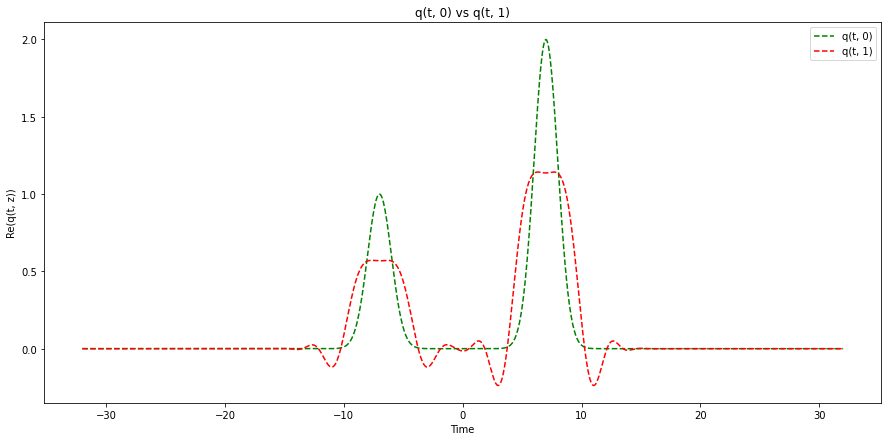

In [48]:
plt.plot(parameters.t, np.squeeze(qt0.real), 'g--', label='q(t, 0)')
plt.plot(parameters.t, np.squeeze(qt1.real), 'r--', label='q(t, 1)')
plt.xlabel('Time')
plt.ylabel('Re(q(t, z))')
plt.legend()
plt.title('q(t, 0) vs q(t, 1)')
plt.show()

## Equilization

* Let's see if the ISI is completely canceled with equalization.

In [49]:
qt1e, qf1e = equalizer.equalize(parameters.t, qt1, parameters.z)

**In time domain**

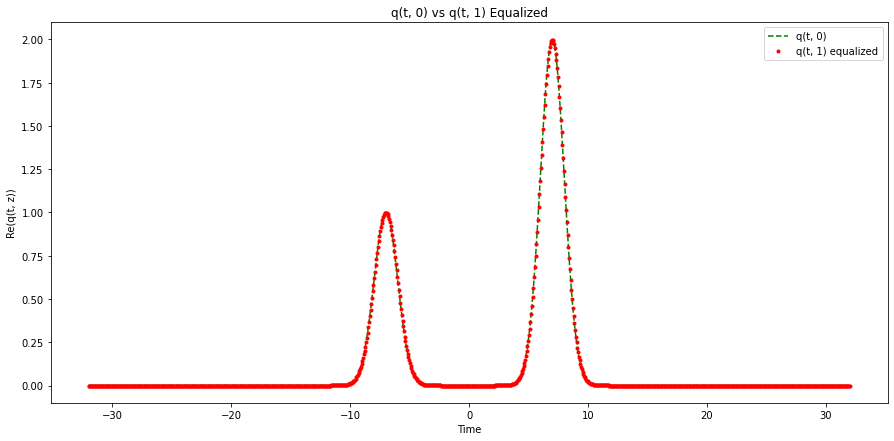

In [50]:
plt.plot(parameters.t, np.squeeze(qt0.real), 'g--', label='q(t, 0)')
plt.plot(parameters.t, np.squeeze(qt1e.real), 'r.', label='q(t, 1) equalized')
plt.xlabel('Time')
plt.ylabel('Re(q(t, z))')
plt.legend()
plt.title('q(t, 0) vs q(t, 1) Equalized')
plt.show()

**In frequency domain**

In [51]:
qf0 = np.fft.fft(qt0)

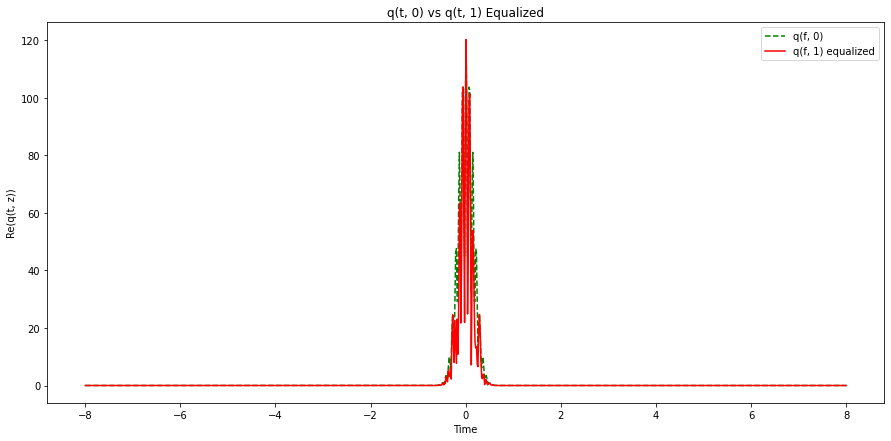

In [52]:
plt.plot(parameters.f, np.absolute(np.squeeze(np.fft.fftshift(qf0))), 'g--', label='q(f, 0)')
plt.plot(parameters.f, np.absolute(np.squeeze(np.fft.fftshift(qf1.real))), 'r-', label='q(f, 1) equalized')
plt.xlabel('Time')
plt.ylabel('Re(q(t, z))')
plt.legend()
plt.title('q(t, 0) vs q(t, 1) Equalized')
plt.show()

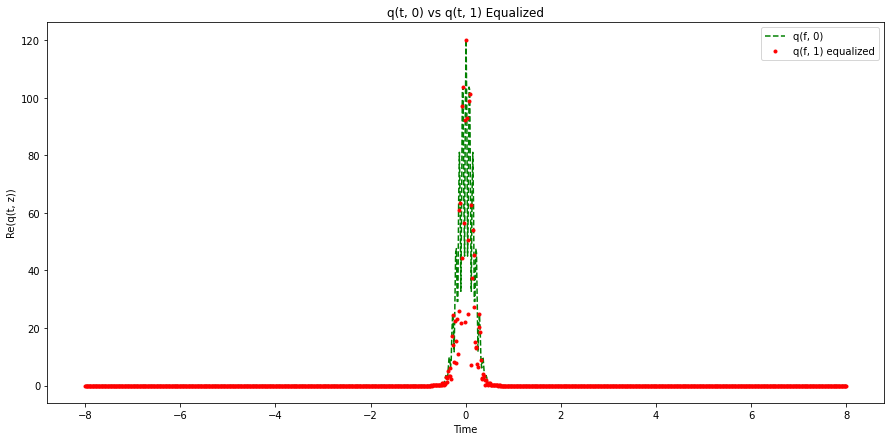

In [53]:
plt.plot(parameters.f, np.absolute(np.squeeze(np.fft.fftshift(qf0))), 'g--', label='q(f, 0)')
plt.plot(parameters.f, np.absolute(np.squeeze(np.fft.fftshift(qf1.real))), 'r.', label='q(f, 1) equalized')
plt.xlabel('Time')
plt.ylabel('Re(q(t, z))')
plt.legend()
plt.title('q(t, 0) vs q(t, 1) Equalized')
plt.show()

## 2.2.4 Performance evaluation

### Noisy channel

We now turn to the noisy channel, let's see how the BER evoluate.

In [54]:
def test_performance_noisy_channel(sigma2, z, t0, parameters):
    qt0 = A1*np.exp(-(parameters.t+t0)**2/(2*D**2)) + A2*np.exp(-(parameters.t-t0)**2/(2*D**2))
    qt1, qf1 = channel.channel(parameters.t, qt0, z, sigma2, parameters.B)
    plt.plot(parameters.t, np.squeeze(qt0.real), 'g--', label='q(t, 0)')
    plt.plot(parameters.t, np.squeeze(qt1.real), 'r--', label='q(t, 1)')
    plt.xlabel('Time')
    plt.ylabel('Re(q(t, z))')
    plt.legend()
    plt.title('q(t, 0) vs q(t, 1)')
    plt.show()

    # equalized output
    qzte, qzfe = equalizer.equalize(parameters.t, qt1, z)

    print("compare(q0t, qzte) : ", compare(q0t, qzte))

    # Demodulation
    qzte = qzte.reshape(1,-1) # if Gaussian
    shat = demodulator.demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)

    # Detection
    stilde, indexes = detector.detector(shat, parameters.M)
    bhat = detector.symbols_to_bit(indexes, parameters.M)
    
    ser = detector.ser(s, stilde)  # symbol error rate
    ber = detector.ber(b, bhat)  # bit error rate
    
    print("The bit-error-rate is : ",ber)
    print("The symbol-error-rate is : ",ser)
    return bhat, stilde

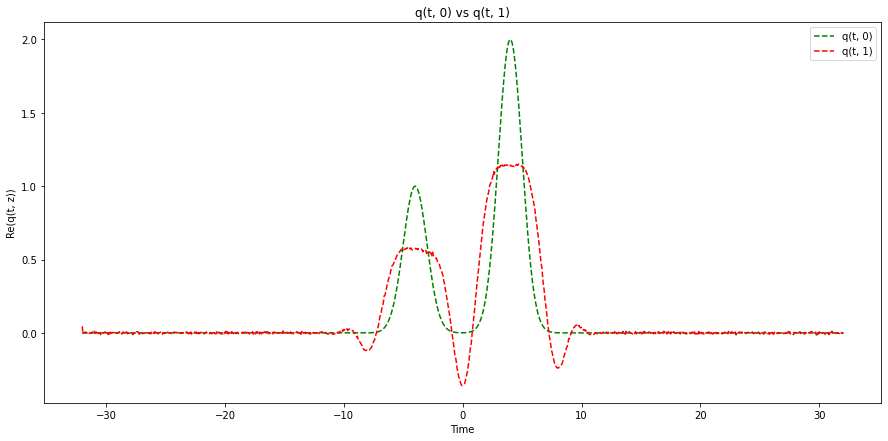

compare(q0t, qzte) :  False
The bit-error-rate is :  0.453125
The symbol-error-rate is :  2.1229929344993628


In [55]:
sigma2 = 0.05
z = 1
t0 = 4
bhat, stilde = test_performance_noisy_channel(sigma2, z, t0, parameters)

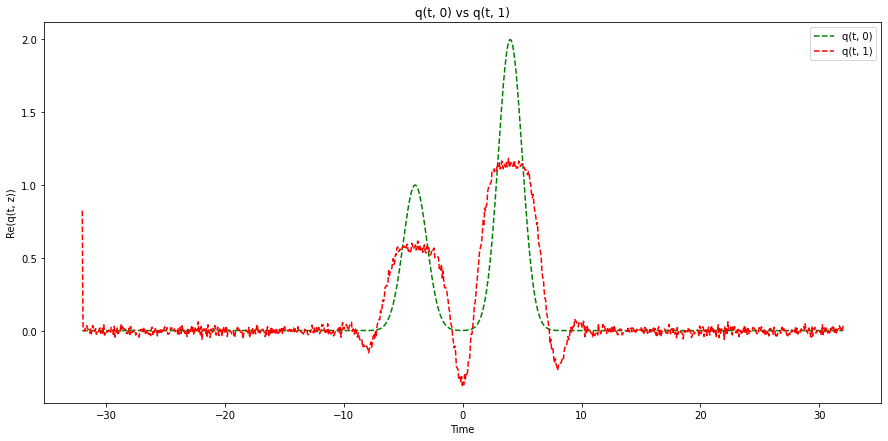

compare(q0t, qzte) :  False
The bit-error-rate is :  0.46875
The symbol-error-rate is :  2.3036539920072743


In [56]:
sigma2 = 0.85
z = 1
t0 = 4
bhat, stilde = test_performance_noisy_channel(sigma2, z, t0, parameters)

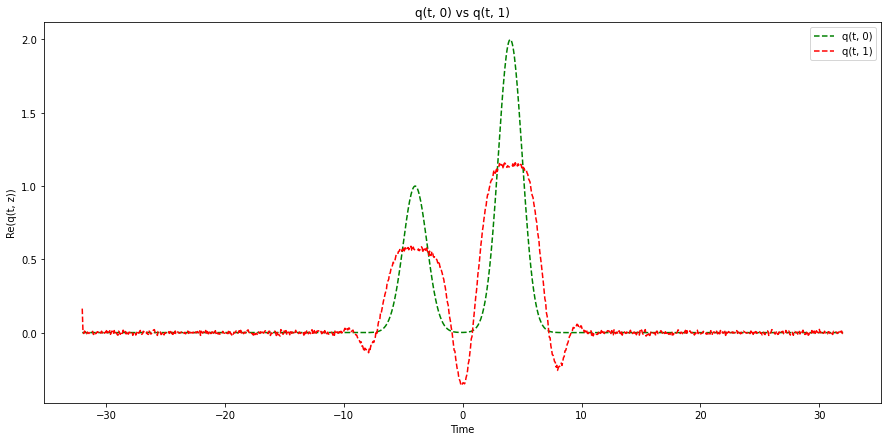

compare(q0t, qzte) :  False
The bit-error-rate is :  0.46875
The symbol-error-rate is :  2.279992692017831


In [57]:
sigma2 = 0.15
z = 1
t0 = 4
bhat, stilde = test_performance_noisy_channel(sigma2, z, t0, parameters)

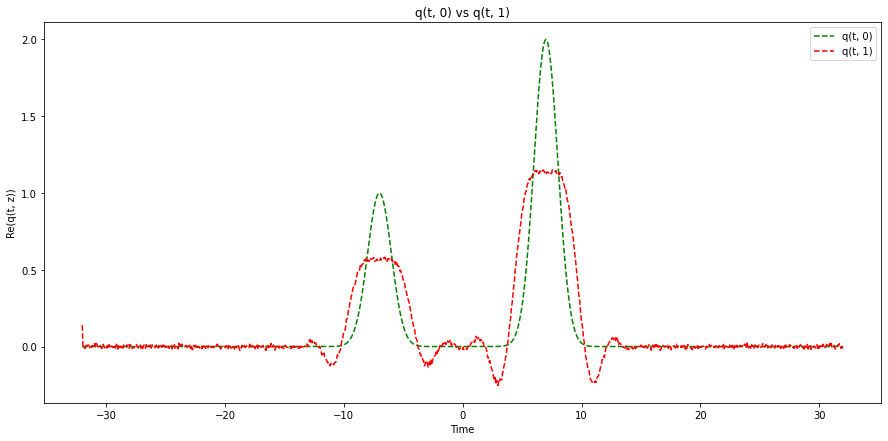

compare(q0t, qzte) :  False
The bit-error-rate is :  0.515625
The symbol-error-rate is :  2.7223481439218045


In [58]:
sigma2 = 0.15
z = 1
t0 = 7
bhat, stilde = test_performance_noisy_channel(sigma2, z, t0, parameters)

## In a noisy channel

We should see a degradatation of the power.

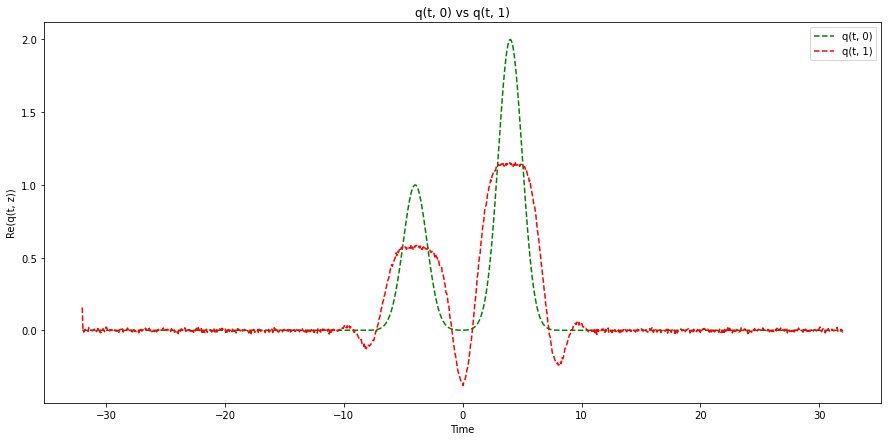

compare(q0t, qzte) :  False
The bit-error-rate is :  0.484375
The symbol-error-rate is :  2.36179801132098


In [283]:
sigma2 = 0.15
z = 1
t0 = 4
bhat, stilde = test_performance_noisy_channel(sigma2, z, t0, parameters)

In [284]:
s

array([-1.+1.j, -2.-1.j, -1.+1.j, -2.-2.j,  2.-2.j,  1.+1.j,  1.-1.j,
       -2.+1.j,  1.+1.j, -2.+1.j, -1.-1.j, -1.+1.j, -1.-2.j,  2.-2.j,
       -2.+1.j,  2.-2.j])

In [285]:
stilde

array([-1.+1.j,  1.+1.j,  1.+1.j,  1.-1.j,  1.-1.j,  1.-1.j,  1.-1.j,
        1.+1.j, -1.+1.j,  1.-1.j,  1.+1.j,  1.-1.j,  2.-1.j,  1.+1.j,
        1.-1.j,  1.-1.j])

In [286]:
compute_signal_power(s, M)

4.437500000000001

In [287]:
compute_signal_power(stilde, M)

2.1875000000000004

## BER vs SNR

We will plot the BER as a function of SNR, for an M-QAM constellation with M = 2, 4, 8, 16 in the same figure.

In [59]:
import statistics

In [104]:
def compute_signal_power(s, M):
    
    if s.ndim > 1 :
        s = np.squeeze(s)
    
    p = 0
    for i in range(len(s)):
        p = p + np.absolute(s[i])**2
    return p/M

def snr(signal_power, noise_power):
    return signal_power/noise_power

def ber_vs_snr_(nbr_experience, list_M, sigmas2):
    
    ber_M = []
    snr_M = []
    dict_M = {}
    
    print("sigmas2 : ", sigmas2)

    for sigma2 in sigmas2:
        
        print("sigma2 : ", sigma2)
        
        for M in tqdm(list_M) :

            # bandwidth
            bandwidth = 1
            # Number of symbols
            nsymbols = 5#10000
            # Sample size
            Nt = 2**10
            # Number of Layers of the Generative network
            nLayers = 500
            # Number of bits
            nb = int(nsymbols * np.log2(M))
            # Time mesh
            timeMesh = int( (nb/bandwidth)+ (10*2/ nb) )
            # Initialize parameters
            parameters = Parameters(bandwidth, nsymbols, M, Nt, nLayers, timeMesh)
            parameters.M = M
            parameters.sigma2 = sigma2
            parameters.nb = nb
            # Initialize the Transmitor
            transmitor = Transmitor()
            # Initialize the Modulator
            modulator = Modulator()
            # Initialize the Channel
            channel = Channel()
            # Initialize the Equalizer
            equalizer = Equalizer()
            # Initialize the NNetGenerator
            nnetGen = NNetGenerator(parameters)
            # Initialize the Detector
            detector = Detector(transmitor)
            # Initialize the Demodulator
            demodulator = Demodulator()

            tmp_snr = []
            tmp_ber = []


            for i in range(nbr_experience):
                #source
                b = transmitor.source(parameters.nb , parameters.p)

                # symbol sequence
                s = transmitor.bit_to_symb(b, M)

                # Modulation
                q0t = modulator.mod(parameters.t, s, parameters.B)

                # propagation (with zero noise), output in t,f
                qzt, qzf = channel.channel(parameters.t, q0t, parameters.z, sigma2, parameters.B)

                # equalized output
                qzte, qzfe = equalizer.equalize(parameters.t, qzt, parameters.z)

                # Demodulation
                shat = demodulator.demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)

                # Detection
                stilde, indexes = detector.detector(shat, M)
                bhat = detector.symbols_to_bit(indexes, M)

                # bit error rate
                ber_value = detector.ber(b, bhat) 

                # Performances
                #signal_power = compute_signal_power(shat, M)
                signal_power = compute_signal_power(s, M)
                noise_power = sigma2 * parameters.B * (parameters.z/parameters.nz)
                snr_value = snr(signal_power, noise_power)

                tmp_snr.append(snr_value)
                tmp_ber.append(ber_value)

            snr_M.append(statistics.mean(tmp_snr))
            ber_M.append(statistics.mean(tmp_ber))
            
            print(dict_M)

            dict_M[M] = dict_M[M].append(statistics.mean(tmp_ber))
            print(dict_M)
    return ber_M, snr_M


def ber_vs_snr(nbr_experience, list_M, sigmas2):
    
    ber_M = []
    snr_M = []
    
    for sigma2 in tqdm(sigmas2):
    
        # bandwidth
        bandwidth = 1
        # Number of symbols
        nsymbols = 5#10000
        # Sample size
        Nt = 2**10
        # Number of Layers of the Generative network
        nLayers = 500
        # Number of bits
        nb = int(nsymbols * np.log2(M))
        # Time mesh
        timeMesh = int( (nb/bandwidth)+ (10*2/ nb) )
        # Initialize parameters
        parameters = Parameters(bandwidth, nsymbols, M, Nt, nLayers, timeMesh)
        parameters.M = M
        parameters.sigma2 = sigma2
        parameters.nb = nb
        # Initialize the Transmitor
        transmitor = Transmitor()
        # Initialize the Modulator
        modulator = Modulator()
        # Initialize the Channel
        channel = Channel()
        # Initialize the Equalizer
        equalizer = Equalizer()
        # Initialize the NNetGenerator
        nnetGen = NNetGenerator(parameters)
        # Initialize the Detector
        detector = Detector(transmitor)
        # Initialize the Demodulator
        demodulator = Demodulator()

        tmp_snr = []
        tmp_ber = []


        for i in range(nbr_experience):
            #source
            b = transmitor.source(parameters.nb , parameters.p)

            # symbol sequence
            s = transmitor.bit_to_symb(b, M)

            # Modulation
            q0t = modulator.mod(parameters.t, s, parameters.B)

            # propagation (with zero noise), output in t,f
            qzt, qzf = channel.channel(parameters.t, q0t, parameters.z, sigma2, parameters.B)

            # equalized output
            qzte, qzfe = equalizer.equalize(parameters.t, qzt, parameters.z)

            # Demodulation
            shat = demodulator.demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)

            # Detection
            stilde, indexes = detector.detector(shat, M)
            bhat = detector.symbols_to_bit(indexes, M)

            # bit error rate
            ber_value = detector.ber(b, bhat) 

            # Performances
            #signal_power = compute_signal_power(shat, M)
            signal_power = compute_signal_power(s, M)
            noise_power = sigma2 * parameters.B * (parameters.z/parameters.nz)
            snr_value = snr(signal_power, noise_power)

            tmp_snr.append(snr_value)
            tmp_ber.append(ber_value)

        snr_M.append(statistics.mean(tmp_snr))
        ber_M.append(statistics.mean(tmp_ber))

    return ber_M, snr_M

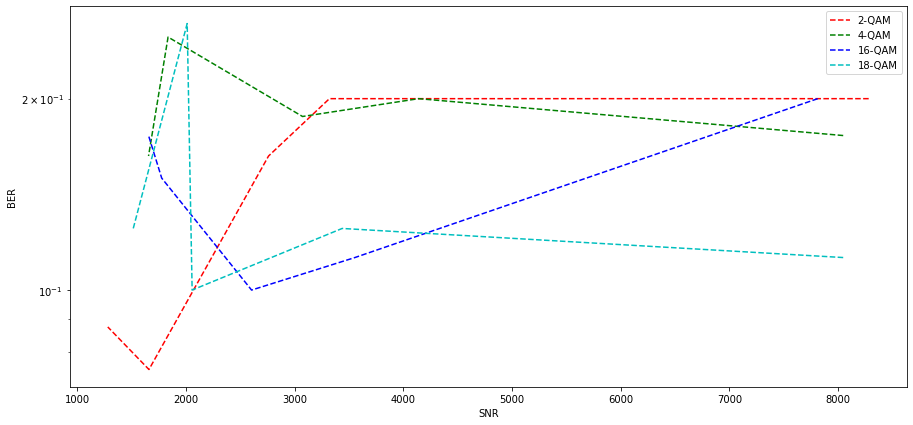

In [111]:
plt.semilogy(sr_2, br_2, 'r--', label="2-QAM")
plt.semilogy(sr_4, br_4, 'g--', label="4-QAM")
plt.semilogy(sr_8, br_8, 'b--', label="16-QAM")
plt.semilogy(sr_16, br_16, 'c--', label="18-QAM")

plt.xlabel("SNR")
plt.ylabel("BER")
plt.legend()
plt.show()

In [ ]:
sigmas2=[0.1,0.2,0.3,0.4,0.5]
nbr_experience = 500
br_2, sr_2 = ber_vs_snr(nbr_experience, 2,sigmas2)
br_4, sr_4 = ber_vs_snr(nbr_experience, 4,sigmas2)
br_8, sr_8 = ber_vs_snr(nbr_experience, 8,sigmas2)
br_16, sr_16 = ber_vs_snr(nbr_experience, 16,sigmas2)

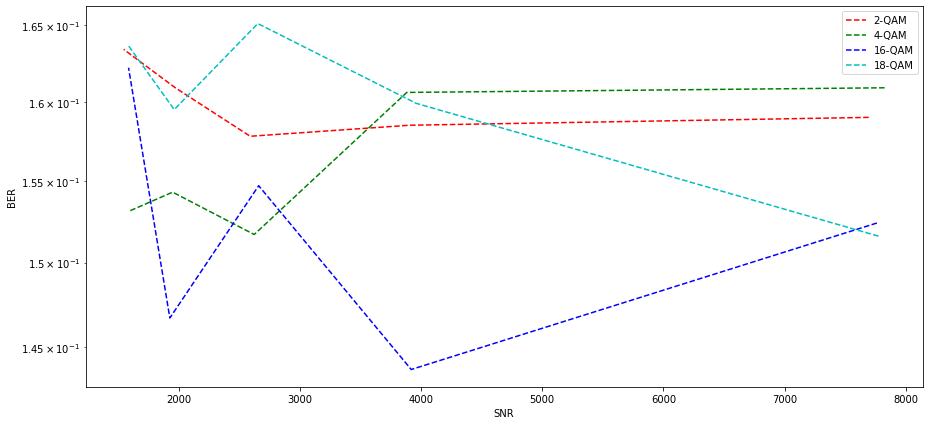

In [118]:
plt.semilogy(sr_2, br_2, 'r--', label="2-QAM")
plt.semilogy(sr_4, br_4, 'g--', label="4-QAM")
plt.semilogy(sr_8, br_8, 'b--', label="16-QAM")
plt.semilogy(sr_16, br_16, 'c--', label="18-QAM")

plt.xlabel("SNR")
plt.ylabel("BER")
plt.legend()
plt.show()

In [119]:
sigmas2=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
nbr_experience = 1000
br_2, sr_2 = ber_vs_snr(nbr_experience, 2,sigmas2)
br_4, sr_4 = ber_vs_snr(nbr_experience, 4,sigmas2)
br_8, sr_8 = ber_vs_snr(nbr_experience, 8,sigmas2)
br_16, sr_16 = ber_vs_snr(nbr_experience, 16,sigmas2)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [16:17<00:00, 108.66s/it]


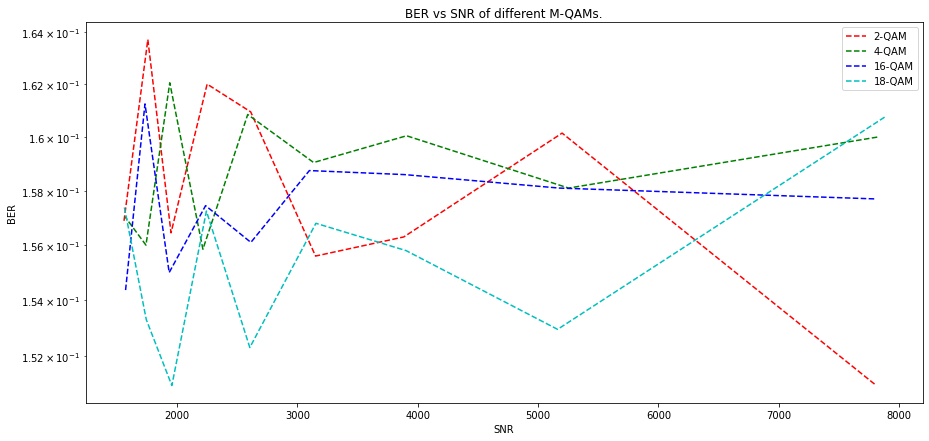

In [122]:
plt.semilogy(sr_2, br_2, 'r--', label="2-QAM")
plt.semilogy(sr_4, br_4, 'g--', label="4-QAM")
plt.semilogy(sr_8, br_8, 'b--', label="16-QAM")
plt.semilogy(sr_16, br_16, 'c--', label="18-QAM")

plt.xlabel("SNR")
plt.ylabel("BER")
plt.title("BER vs SNR of different M-QAMs.")
plt.legend()
plt.show()

In [ ]:
sigmas2=[0.1,0.2,0.3,0.4,0.5]
nbr_experience = 2000
br_2_, sr_2_ = ber_vs_snr(nbr_experience, 2,sigmas2)
br_4_, sr_4_ = ber_vs_snr(nbr_experience, 4,sigmas2)
br_8_, sr_8_ = ber_vs_snr(nbr_experience, 8,sigmas2)
br_16_, sr_16_ = ber_vs_snr(nbr_experience, 16,sigmas2)

In [ ]:
plt.semilogy(sr_2_, br_2_, 'r--', label="2-QAM")
plt.semilogy(sr_4_, br_4_, 'g--', label="4-QAM")
plt.semilogy(sr_8_, br_8_, 'b--', label="16-QAM")
plt.semilogy(sr_16_, br_16_, 'c--', label="18-QAM")

plt.xlabel("SNR")
plt.ylabel("BER")
plt.legend()
plt.show()

In [115]:
br_2

[0.2, 0.2, 0.1625, 0.075, 0.08750000000000001]

In [114]:
br_4

[0.175, 0.19999999999999998, 0.1875, 0.25, 0.1625]

In [112]:
br_8

[0.2, 0.1125, 0.1, 0.15, 0.175]

In [113]:
br_16

[0.1125, 0.125, 0.1, 0.2625, 0.125]

In [102]:
br

[0.15, 0.1875, 0.05, 0.15, 0.1625]

In [382]:
# old implementation
ber_M_noisy, snr_M_noisy = ber_vs_snr_(15, [2,4,8,16],sigma2=0.15)

100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [2:19:09<00:00, 2087.44s/it]


In [383]:
ber_M_noisy

[0.49903333333333333, 0.4561, 0.4808222222222222, 0.48877166666666666]

In [384]:
snr_M_noisy

[66666.66666666669, 33333.33333333334, 16666.66666666667, 20824.750000000004]

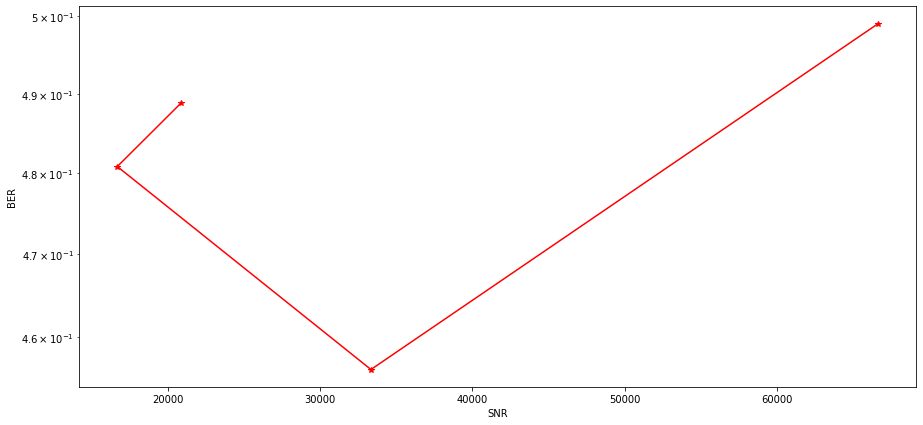

In [388]:
plt.semilogy(snr_M_noisy, ber_M_noisy, 'r*-')
plt.xlabel("SNR")
plt.ylabel("BER")
plt.show()

# 2.3 Generative deep neural network

In [6]:
q0t = modulator.mod(parameters.t,val_s, parameters.B)
y_gen = nnetGen.nnet_gen(q0t)

# Data Gen

In [448]:
# Generating the dataset
def generateDataset(nbrOfObservations, parameters, transmitor, modulator, nnetGen, demodulator, detector, isGaussian =False):

    X = np.ndarray((nbrOfObservations, parameters.N), dtype=np.complex128)
    y = np.ndarray((nbrOfObservations, parameters.N), dtype=np.complex128)    
    bits_in = np.ndarray((nbrOfObservations, parameters.nb))
    bhat_out = np.ndarray((nbrOfObservations, parameters.nb))
    symb_in = np.ndarray((nbrOfObservations, parameters.n))
    symb_out = np.ndarray((nbrOfObservations, parameters.n))


    print("[INFO] Generating the dataset...")

    for i in tqdm(range(nbrOfObservations)):
        
        # Constellation
        constellation = transmitor.build_constellations(parameters.M)
        
        #source
        source = transmitor.source(parameters.nb , parameters.p) # USE IT FOR NEXT PART OF BITS
        
        # Bits to Symboles - symbol sequence
        bitsToSymbols = transmitor.bit_to_symb(source, parameters.M)

        # symbol sequence, we create a list of values of the complex symbols to use them in modulation
        s = transmitor.bit_to_symb(source, parameters.M)
        
        # channel - we take gaussian input
        if isGaussian:
            q0t = parameters.A*np.exp(-parameters.t**2) 

        else :
            q0t = modulator.mod(parameters.t,s, parameters.B)  
        
        # Neural Net Generator
        y_gen = nnetGen.nnet_gen(q0t)
        # equalized y_gen
        qzte, qzfe = equalizer.equalize(parameters.t, y_gen, parameters.z) # equalized output
        qzte = qzte.reshape(1,-1)
        # demodulation
        shat = demodulator.demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)

        # detection
        stilde, indexes = detector.detector(shat, parameters.M)
        bhat = detector.symbols_to_bit(indexes, parameters.M)
        
        # SOURCE IS THE SEQUENCE OF BITS TO BE LEARNED
        
        # Modulated signal
        X[i] = np.squeeze(q0t)
        # Neural Net Generator
        y[i] = y_gen
        # original bit sequence (source)
        bits_in[i] = source
        # estimated bit sequence
        bhat_out[i] = bhat
        # original symbol sequence (source)

        symb_in[i] = np.squeeze(s)
        # estimated symbol sequence
        symb_out[i] = np.squeeze(shat)
        
    print("[INFO] The dataset is ready now !")

    return X, y, bits_in, bhat_out, symb_in, symb_out

In [449]:
nbrOfObservations = 5000 #(1h for 100 observations)

In [450]:
parameters.n

16

In [451]:
X, y, bits_in, bhat_out, symb_in, symb_out = generateDataset(nbrOfObservations, parameters, transmitor, modulator, nnetGen, demodulator, detector, isGaussian =False)

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]

[INFO] Generating the dataset...


C:\Python36\lib\site-packages\ipykernel_launcher.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Python36\lib\site-packages\ipykernel_launcher.py:61: ComplexWarning: Casting complex values to real discards the imaginary part
  1%|▌                                                                               | 38/5000 [00:12<27:17,  3.03it/s]


KeyboardInterrupt: 

In [ ]:
index = 0
plt.plot(np.abs(X[index]))
plt.plot(np.abs(y[index]))

In [ ]:
plt.plot(X[index])
plt.plot(y[index])

# Data preparation

In [ ]:
t1 = time.time()
# if scaling=True, we are using min-max scaler
df = prepareDataFrame(X, y, scaling=False)
#df.to_csv("../data/data_90K.csv.gz", index=False, compression="gzip")
t2 = time.time()
print("Toral time to prepare the dataframe is : ", t2-t1, " seconds.")

In [ ]:
n_samples, n_features = X.shape
n_hidden = 512

In [ ]:
withReshape = True
ts = 0.25
X_train, X_test, y_train, y_test = prepareTrainAndTestData(df, withReshape, ts)

In [ ]:
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

# Model

In [ ]:
def evals(model, X_test, y_test, index_pred, opti, train_err, val_err, nsymbols=16):
    
    # Training and validation error plot
    n = len(train_err)
    training, = plt.plot(range(n), train_err, label="Training Error")
    validation, = plt.plot(range(n), val_err, label="Validation Error")
    plt.legend(handles=[training, validation])
    plt.title("Error Plot using "+str(opti))
    plt.ylabel('Error')
    plt.xlabel('Iterations')
    plt.show()
    
    y_pred = model.predict(X_test[index_pred])
    
    plt.title("Predicted Signal")
    plt.plot(np.squeeze(np.abs(y_pred)))
    plt.show()
    
    plt.title("Predicted Signal vs Original")
    plt.plot(np.squeeze(np.abs(y_pred)), label="prediction")
    plt.plot(np.squeeze(np.abs(y_test[index_pred])), label="original")
    plt.legend()
    plt.show()
    
    evaluate_ber(y_pred, y_test, index_pred, nsymbols)
    
    return y_pred

def evaluate_ber(y_pred, y_test, index_pred, nsymbols):
    
    nLayers = 500                         # Number of Layers of the Generative network
    y_ori = y_test[index_pred]
    # Initialize parameters
    parameters = Parameters(nsymbols=nsymbols, nLayers=nLayers)
    # Initialize the Equalizer
    equalizer = Equalizer()
    # Initialize the Demodulator
    demodulator = Demodulator()
    # Initialize the Transmitor
    transmitor = Transmitor()
    # Initialize the Detector
    detector = Detector(transmitor)
    
    # propagation & equalization.
    q0t = fromRealToComplex(y_pred)    
    #qzt, qzf = channel.channel(parameters.t, q0t, parameters.z, parameters.sigma2, parameters.B) 
    qzt = q0t
    qzte, qzfe = equalizer.equalize(parameters.t, qzt, parameters.z) # equalized output
    # demodulation
    shat = demodulator.demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)
    #shat = demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)

    # detection
    stilde, indexes = detector.detector(shat, parameters.M)
    bhat = detector.symbols_to_bit(indexes, parameters.M)
    y_ori = y_ori.reshape(1,-1)
    # propagation & equalization.
    q0t = fromRealToComplex(y_ori)
    print(q0t.shape)
    qzt = q0t
    qzte, qzfe = equalizer.equalize(parameters.t, qzt, parameters.z) # equalized output
    # demodulation
    shat = demodulator.demod(parameters.t, parameters.dt, qzte, parameters.B, parameters.n)

    # detection
    stilde, indexes = detector.detector(shat, parameters.M)
    b = detector.symbols_to_bit(indexes, parameters.M)
    
    ser = detector.ser(s, stilde)  # symbol error rate
    ber = detector.ber(b, bhat)  # bit error rate
    
    print("b : ", b)
    print("bhat : ", bhat)
    print("ber : ", ber)
    print("ser : ", ser)

In [ ]:
optimizer = Adam()
opti = 'Adam'
n_features = 2048
n_output = 2048
rect_mlp = NeuralNetwork(optimizer=optimizer,
                        loss=SquareLoss,
                        validation_data=(X_test, y_test))

In [ ]:
rect_mlp.add(Dense(256, input_shape=(n_features,)))
rect_mlp.add(Activation('selu'))
rect_mlp.add(Dropout(0.25))
rect_mlp.add(BatchNormalization())

rect_mlp.add(Dense(128))
rect_mlp.add(Activation('selu'))
rect_mlp.add(Dropout(0.25))
rect_mlp.add(BatchNormalization())

rect_mlp.add(Dense(32))
rect_mlp.add(Activation('selu'))
rect_mlp.add(Dropout(0.25))
rect_mlp.add(BatchNormalization())

rect_mlp.add(Dense(128))
rect_mlp.add(Activation('selu'))
rect_mlp.add(Dropout(0.25))
rect_mlp.add(BatchNormalization())

rect_mlp.add(Dense(256))
rect_mlp.add(Activation('selu'))
rect_mlp.add(Dropout(0.25))
rect_mlp.add(BatchNormalization())

rect_mlp.add(Dense(n_output))
rect_mlp.add(Activation('selu'))

print ()
rect_mlp.summary(name="MLP")

In [ ]:
num_epochs = 40
batch_size = 256

In [ ]:
print("[INFO] Batch size : ", batch_size)
print("[INFO] Training epochs number : ", num_epochs)
train_err_rect, val_err_rect = rect_mlp.fit(X_train, y_train, num_epochs, batch_size)

## Performance evaluation of the model

In [ ]:
index_pred= 0
y_pred = evals(rect_mlp, X_test, y_test, index_pred, opti, train_err_rect, val_err_rect)